In [1]:
# Dependencies
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import csv and quick clean dataframe for modeling. Leave secondary comments for alternative column models
star_df = pd.read_csv(os.path.join("..", "Resources", "movie_metadata_adjusted_revenue_starpower.csv"))
# star_df['budget'] = star_df['budget'].astype(int)
star_df['budget'] = star_df['budget'].str.replace(',','').astype(float).astype(int)
star_df['revenue'] = star_df['revenue'].str.replace(',','').astype(float).astype(int)
star_df['popularity'] = star_df['popularity'].astype(int)
star_df['star_power'] = star_df['star_power'].astype(str)
star_df['vote_count'] = star_df['vote_count'].astype(int)

star_df2 = star_df.drop(columns={'Column1','title','release_date'}, axis=1)

star_df2

budget  popularity     revenue  runtime  vote_average  vote_count  \
0      36703349          41  1499126346      175           8.5        6024   
1      43134278          51    48899552      142           8.5        8358   
2      96693277          63   154791744      139           8.3        9678   
3      38930103          41   568672494      195           8.3        4436   
4      14258364          35   517964907      133           8.3        3001   
...         ...         ...         ...      ...           ...         ...   
1076  175859697           9   373412184      103           4.7        1180   
1077   64806136           9   169652635       95           4.7        1163   
1078  129468354          17   181231524      100           4.4        2322   
1079  199143302          17   379498823      125           4.2        1447   
1080    4315611          10    56562409       91           4.1        1034   

     star_power         first_genre  
0             1               Drama  
1             1               Drama  
2             1              Comedy  
3             1               Drama  
4             1            Classics  
...         ...                 ...  
1076          0  Action & Adventure  
1077          1  Action & Adventure  
1078          2  Action & Adventure  
1079          1  Action & Adventure  
1080          1  Mystery & Suspense  

[1081 rows x 8 columns]

In [3]:
star_df_final = pd.concat([star_df2,pd.get_dummies(star_df2['first_genre'], dummy_na=False)], axis=1)
star_df_final.drop(['first_genre'], axis=1, inplace=True)
star_df_final

budget  popularity     revenue  runtime  vote_average  vote_count  \
0      36703349          41  1499126346      175           8.5        6024   
1      43134278          51    48899552      142           8.5        8358   
2      96693277          63   154791744      139           8.3        9678   
3      38930103          41   568672494      195           8.3        4436   
4      14258364          35   517964907      133           8.3        3001   
...         ...         ...         ...      ...           ...         ...   
1076  175859697           9   373412184      103           4.7        1180   
1077   64806136           9   169652635       95           4.7        1163   
1078  129468354          17   181231524      100           4.4        2322   
1079  199143302          17   379498823      125           4.2        1447   
1080    4315611          10    56562409       91           4.1        1034   

     star_power  Action & Adventure  Animation  Art House & International  \
0             1                   0          0                          0   
1             1                   0          0                          0   
2             1                   0          0                          0   
3             1                   0          0                          0   
4             1                   0          0                          0   
...         ...                 ...        ...                        ...   
1076          0                   1          0                          0   
1077          1                   1          0                          0   
1078          2                   1          0                          0   
1079          1                   1          0                          0   
1080          1                   0          0                          0   

      ...  Comedy  Cult Movies  Drama  Horror  Kids & Family  \
0     ...       0            0      1       0              0   
1     ...       0            0      1       0              0   
2     ...       1            0      0       0              0   
3     ...       0            0      1       0              0   
4     ...       0            0      0       0              0   
...   ...     ...          ...    ...     ...            ...   
1076  ...       0            0      0       0              0   
1077  ...       0            0      0       0              0   
1078  ...       0            0      0       0              0   
1079  ...       0            0      0       0              0   
1080  ...       0            0      0       0              0   

      Mystery & Suspense  None  Romance  Science Fiction & Fantasy  Western  
0                      0     0        0                          0        0  
1                      0     0        0                          0        0  
2                      0     0        0                          0        0  
3                      0     0        0                          0        0  
4                      0     0        0                          0        0  
...                  ...   ...      ...                        ...      ...  
1076                   0     0        0                          0        0  
1077                   0     0        0                          0        0  
1078                   0     0        0                          0        0  
1079                   0     0        0                          0        0  
1080                   1     0        0                          0        0  

[1081 rows x 21 columns]

In [4]:
# set up data, target and feature_names variables for future use. Leave secondary values
# commented should we wish to run other columns
# target = star_df_final['vote_count']
target = star_df_final['star_power']
# data = star_df_final.drop("vote_count", axis=1)
data = star_df_final.drop("star_power", axis=1)
feature_names = data.columns
feature_names

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'Action & Adventure', 'Animation',
       'Art House & International', 'Classics', 'Comedy', 'Cult Movies',
       'Drama', 'Horror', 'Kids & Family', 'Mystery & Suspense', 'None',
       'Romance', 'Science Fiction & Fantasy', 'Western'],
      dtype='object')

In [5]:
# setup rf model
rf = RandomForestClassifier(max_depth=3, random_state=1)
rf.fit(data, target)

/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [6]:
# bin the data with KBinsDiscretizer
target_model = target.to_numpy().reshape(-1, 1)
enc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
enc.fit(target_model)
result = enc.transform(target_model)
result

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [7]:
# rerun rf on binned data
rf2 = RandomForestClassifier(max_depth=4, random_state=5, n_estimators=200)
rf2.fit(data, result)
print(rf2.feature_importances_)

/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[1.25930290e-01 1.39667890e-01 1.04367409e-01 1.21422176e-01
 1.24666663e-01 9.99391844e-02 8.06693791e-03 6.79240486e-03
 2.92679934e-05 2.45152962e-01 7.13758605e-03 0.00000000e+00
 8.49288890e-03 1.96050945e-03 3.39045210e-05 4.70387050e-03
 1.61928055e-03 0.00000000e+00 1.67744718e-05 0.00000000e+00]


In [8]:
# sort feature_importances with title in descending order
sorted(zip(rf2.feature_importances_,feature_names), reverse=True)

[(0.2451529623414832, 'Classics'),
 (0.13966789027230722, 'popularity'),
 (0.1259302901810248, 'budget'),
 (0.12466666322142868, 'vote_average'),
 (0.12142217583918691, 'runtime'),
 (0.1043674085055527, 'revenue'),
 (0.09993918444089725, 'vote_count'),
 (0.00849288889823575, 'Drama'),
 (0.008066937910225938, 'Action & Adventure'),
 (0.007137586045651669, 'Comedy'),
 (0.00679240485908626, 'Animation'),
 (0.004703870497045231, 'Mystery & Suspense'),
 (0.001960509450235339, 'Horror'),
 (0.0016192805514845005, 'None'),
 (3.3904521014998254e-05, 'Kids & Family'),
 (2.9267993380199584e-05, 'Art House & International'),
 (1.6774471759289764e-05, 'Science Fiction & Fantasy'),
 (0.0, 'Western'),
 (0.0, 'Romance'),
 (0.0, 'Cult Movies')]

In [9]:
# Get numerical feature importances
genres = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(genres, 2)) for feature, genres in zip(feature_names, genres)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:1} Importance: {}'.format(*pair)) for pair in feature_names];
# print(genres)

Variable: b Importance: u
Variable: p Importance: o
Variable: r Importance: e
Variable: r Importance: u
Variable: v Importance: o
Variable: v Importance: o
Variable: A Importance: c
Variable: A Importance: n
Variable: A Importance: r
Variable: C Importance: l
Variable: C Importance: o
Variable: C Importance: u
Variable: D Importance: r
Variable: H Importance: o
Variable: K Importance: i
Variable: M Importance: y
Variable: N Importance: o
Variable: R Importance: o
Variable: S Importance: c
Variable: W Importance: e


In [10]:
# setup train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, result, random_state=1)

In [11]:
# scale the data and get an accuracy score
scaler = StandardScaler()
scaler.fit(X_train)

rf2 = rf2.fit(X_train, y_train)
rf2.score(X_test, y_test)

/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.966789667896679

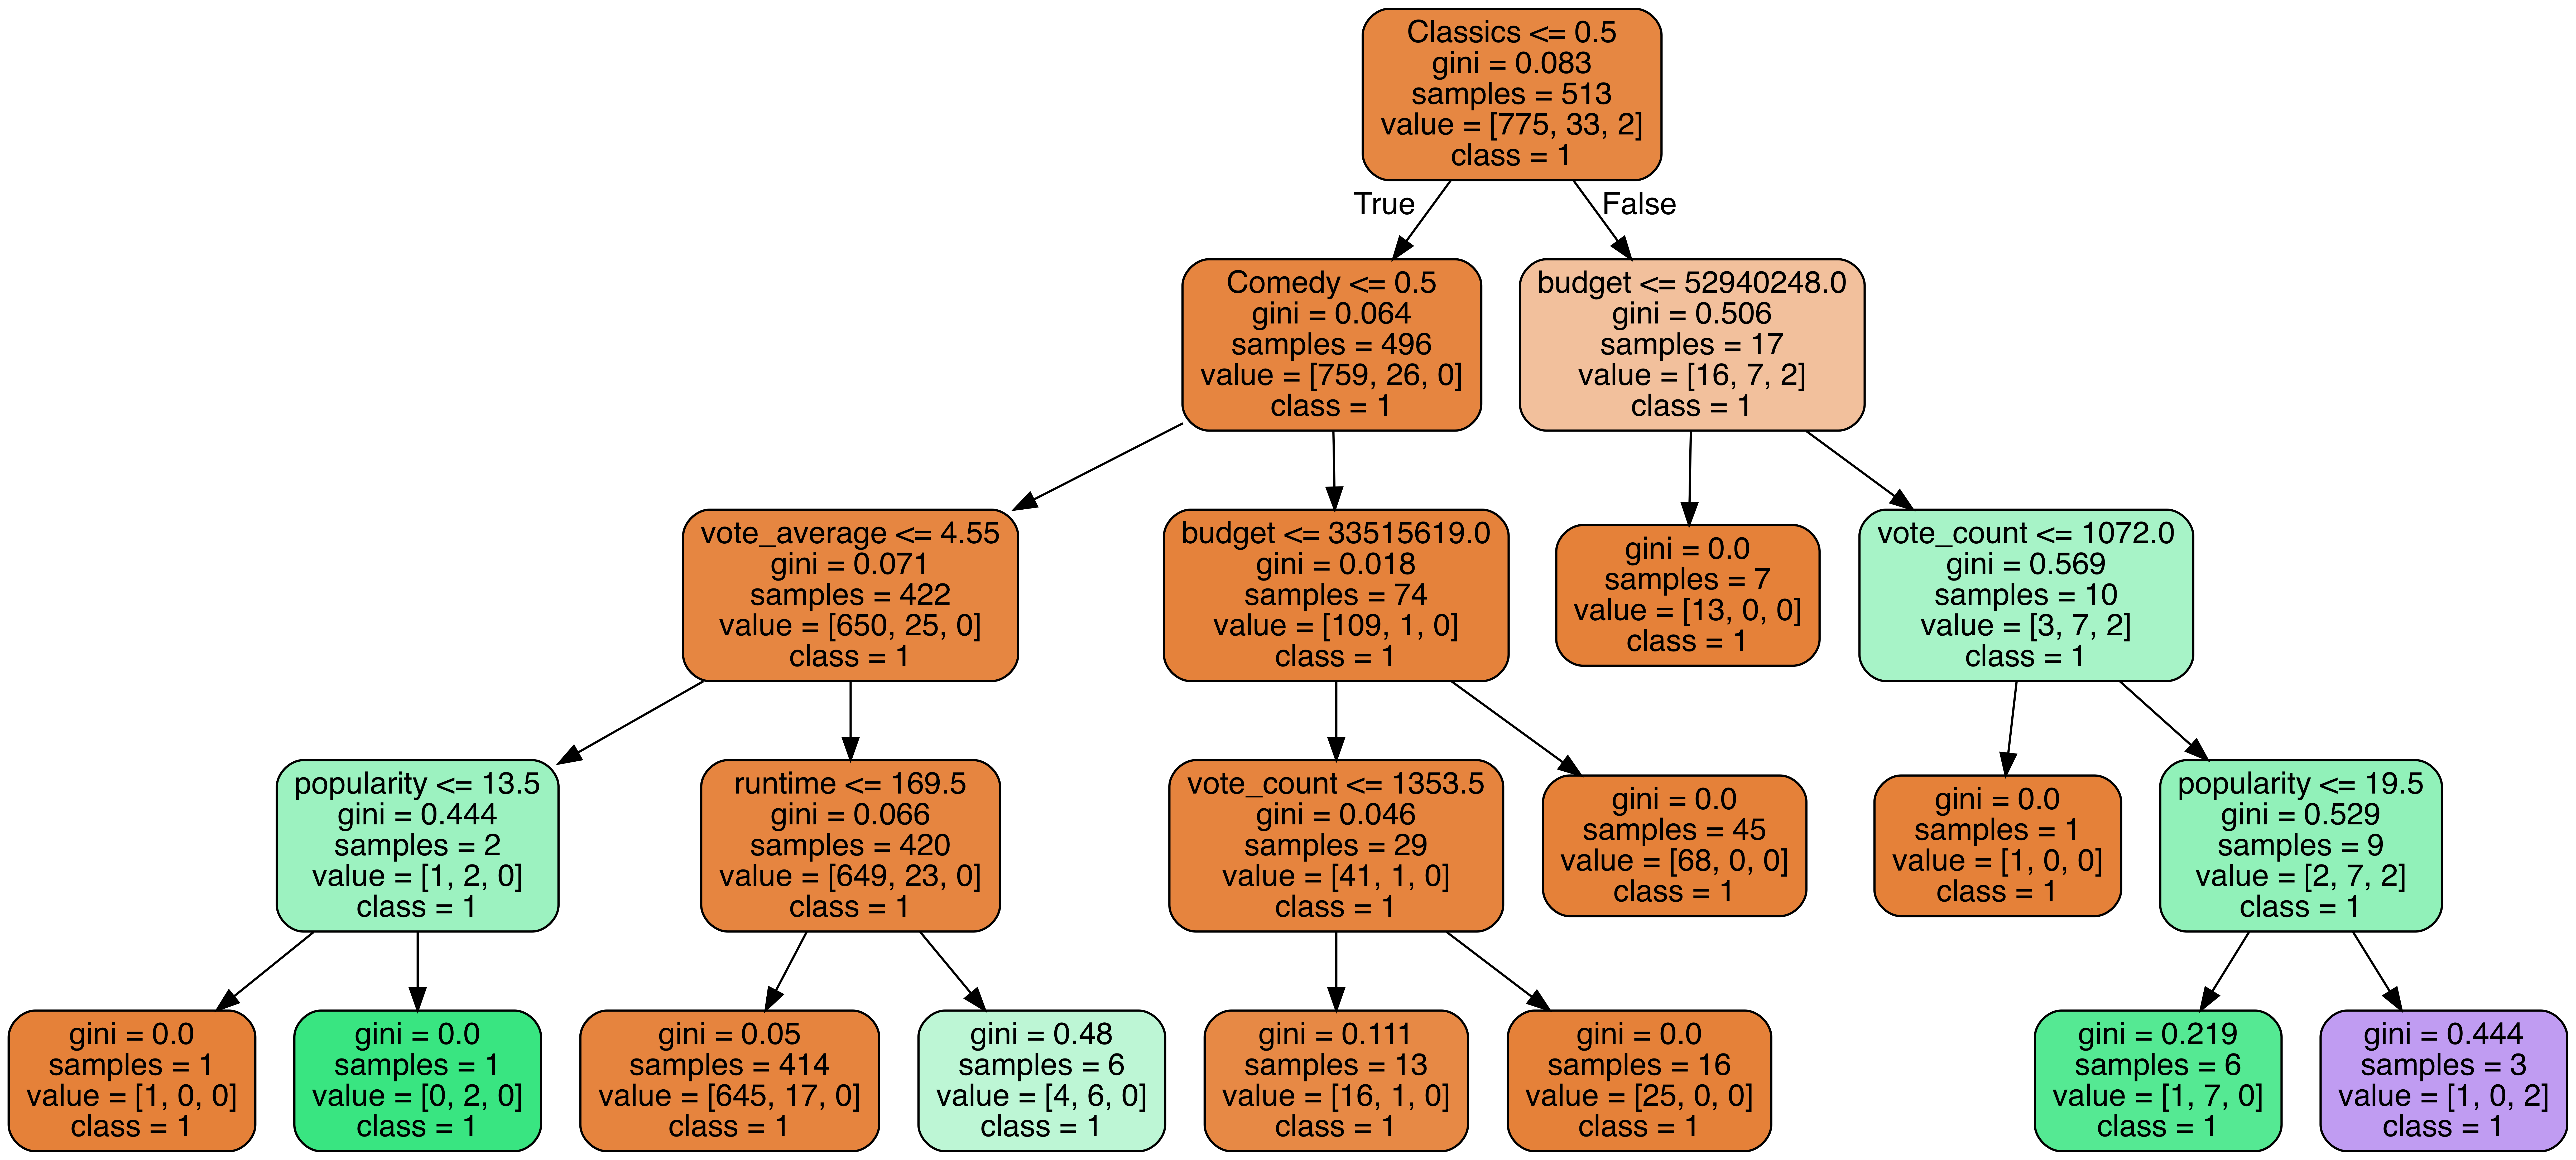

In [17]:
# generate a graphviz and save visual
estimator = rf2.estimators_[39]

export_graphviz(estimator, out_file='star.dot', 
                feature_names = feature_names,
                class_names = target,filled=True,
                rounded = True, proportion = False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'star.dot', '-o', 'stars.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'stars.png')

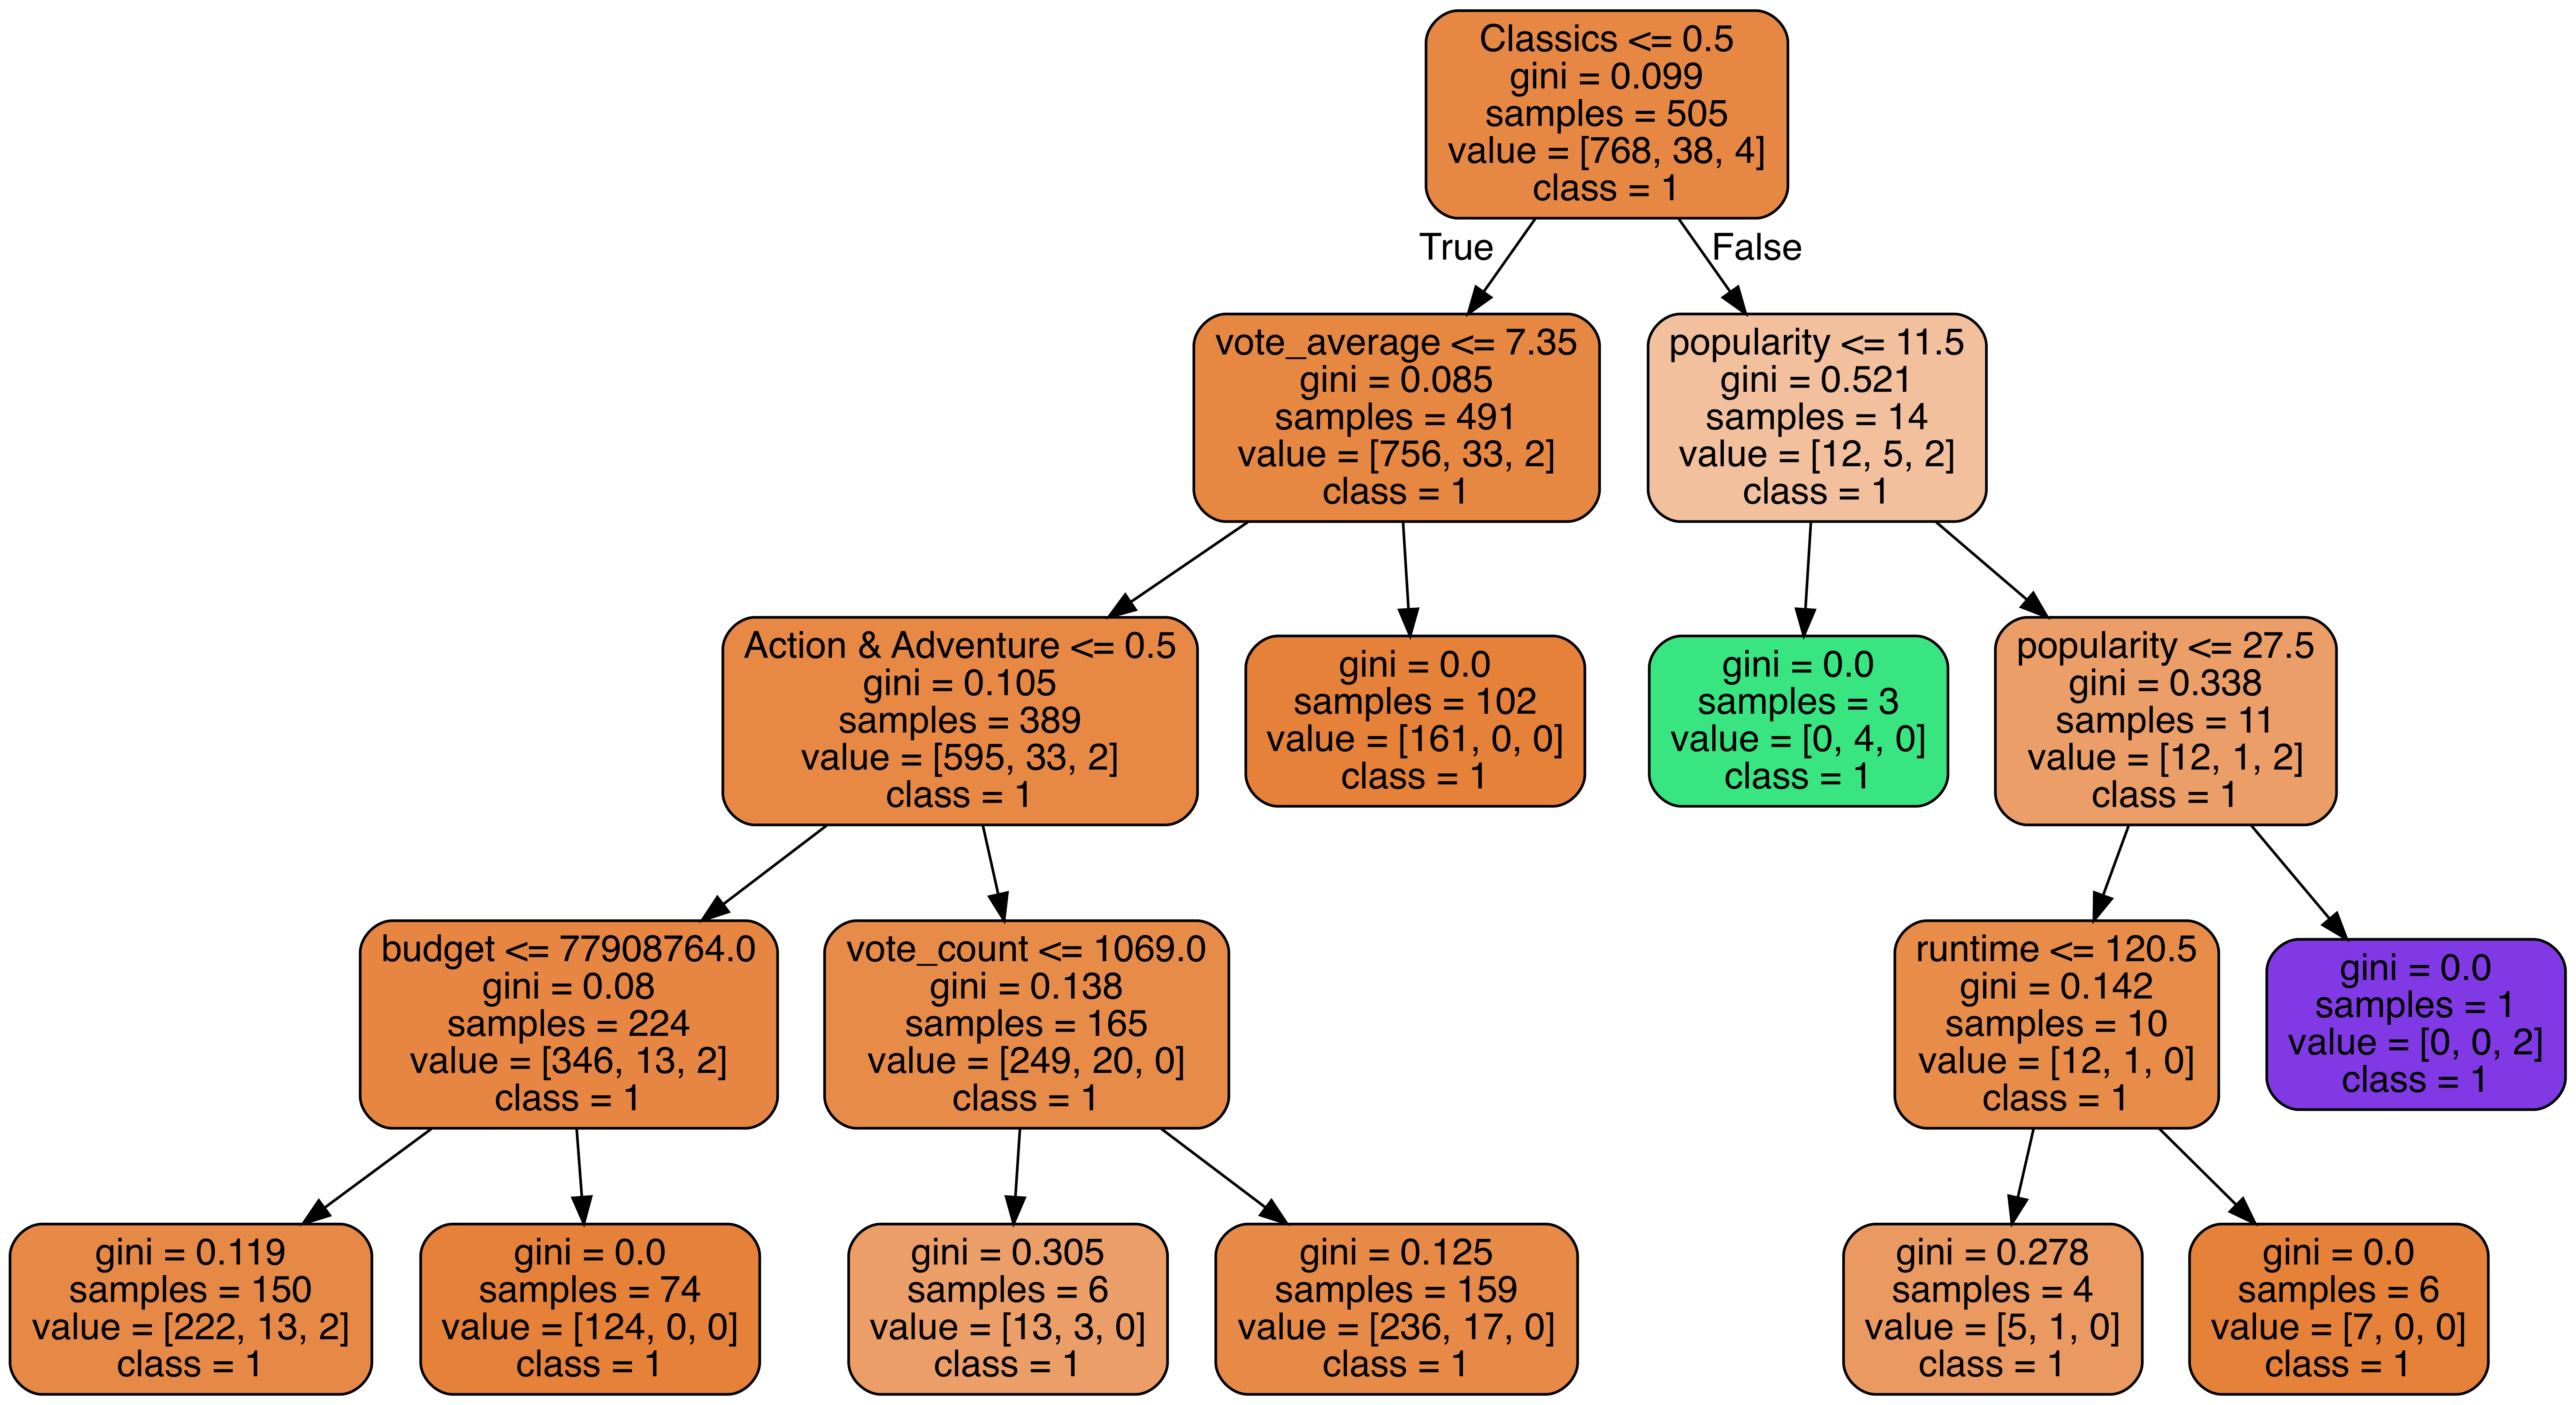

In [15]:
estimator = rf2.estimators_[63]

export_graphviz(estimator, out_file='star_second.dot', 
                feature_names = feature_names,
                class_names = target,filled=True,
                rounded = True, proportion = False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'star_second.dot', '-o', 'stars_second.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'stars_second.png')

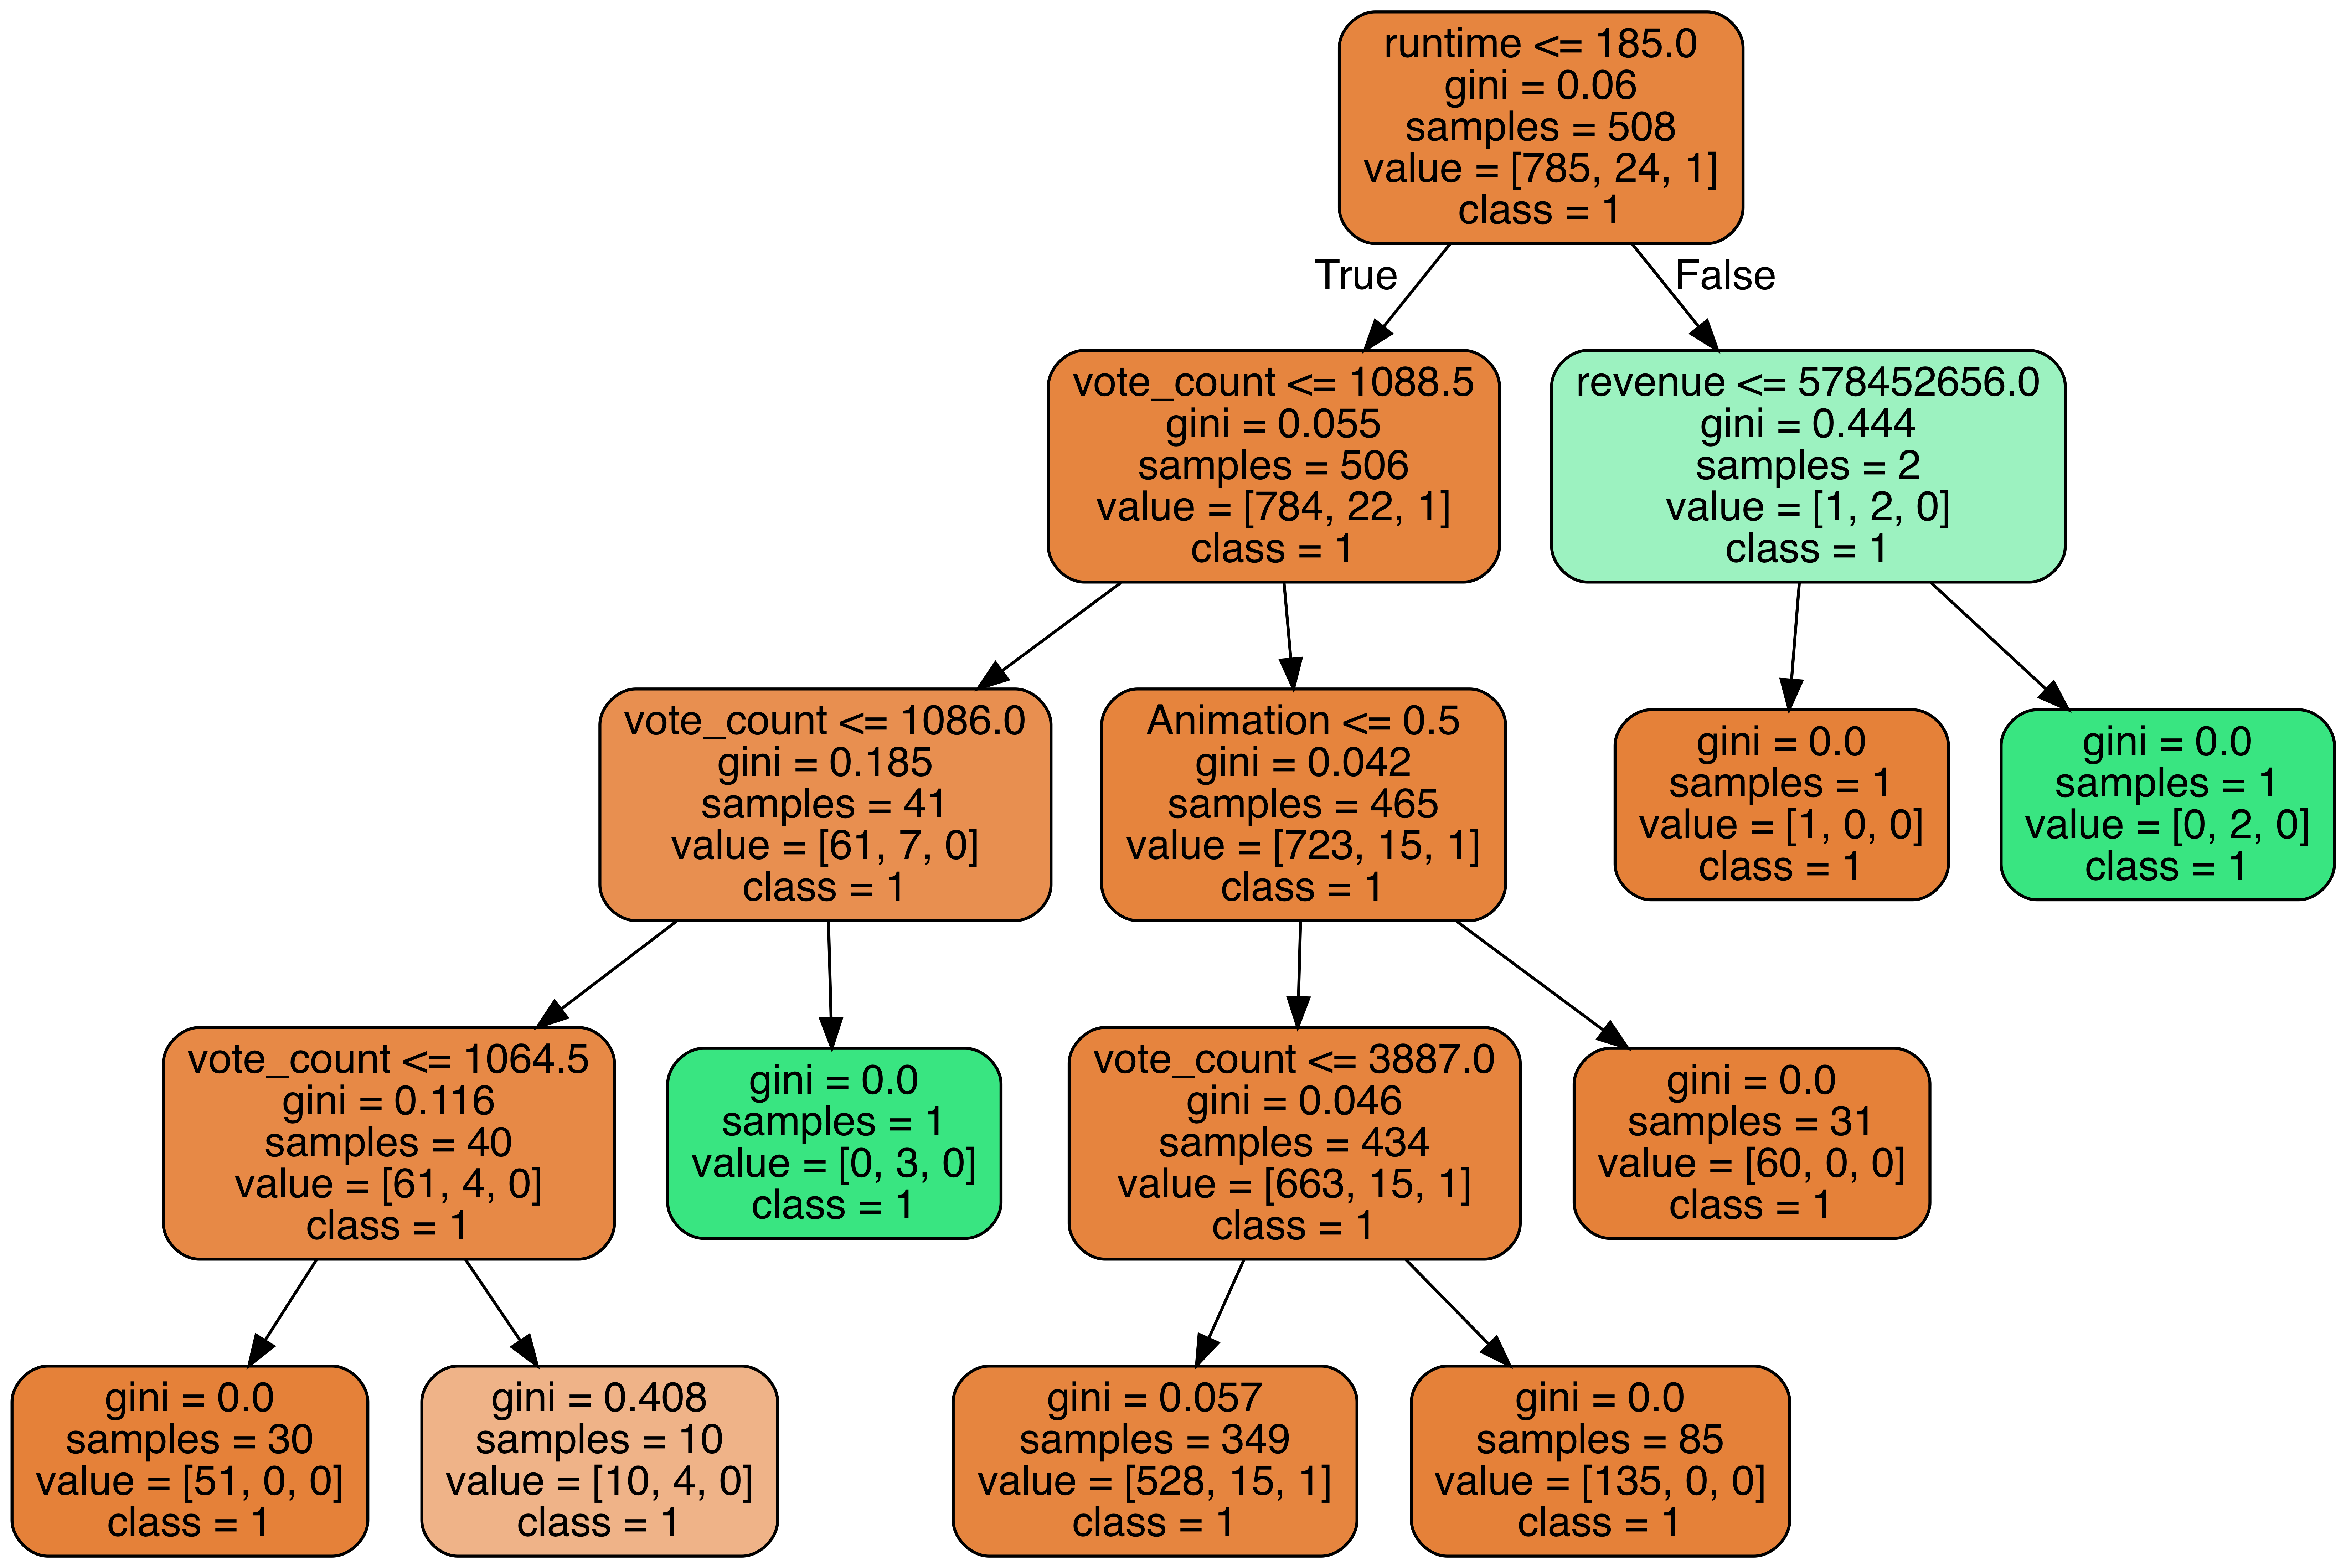

In [16]:
estimator = rf2.estimators_[26]

export_graphviz(estimator, out_file='star_third.dot', 
                feature_names = feature_names,
                class_names = target,filled=True,
                rounded = True, proportion = False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'star_third.dot', '-o', 'stars_third.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'stars_third.png')